# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Pandas](#Section-1)
- [Section 2 &ndash; Data Wrangling](#Section-2)
- [Section 3 &ndash; Data Visualization](#Section-3)

--- 

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [1]:
import pandas as pd
df = pd.read_csv("2019_Yellow_Taxi_Trip_Data.csv")
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

In [2]:
df.shape

(10000, 18)

#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [3]:
stats = df[['fare_amount','tip_amount','tolls_amount','total_amount']]
stats.describe(include='all')

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [4]:
stats = df[['fare_amount','tip_amount','tolls_amount','total_amount','trip_distance']]
dist = stats['trip_distance'].max()
stats[(stats['trip_distance'] == dist)]


,fare_amount,tip_amount,tolls_amount,total_amount,trip_distance
8338,176.0,18.29,6.12,201.21,38.11


---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [5]:
import pandas as pd

In [6]:

df = pd.read_csv("Meteorite_Landings.csv")
df.rename(
    columns={
        'mass (g)': 'mass'},
    inplace=True
)
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [7]:
mask = df.columns.str.contains('lat$|long', regex=True)
columns_to_drop = df.columns[mask]
df = df.drop(columns=columns_to_drop)
df.sort_values(['mass'], ascending=[False]).head()

,name,id,nametype,recclass,mass,fall,year,GeoLocation
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM,"(-19.58333, 17.91667)"
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM,"(76.13333, -64.93333)"
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM,"(-27.46667, -60.58333)"
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM,"(35.05, -111.03333)"
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM,"(47.0, 88.0)"


#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [8]:
import pandas as pd

In [17]:
df = pd.read_csv("Meteorite_Landings.csv")
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [10]:
extr = df['year'].str.extract('/(\d{4})')
extr.head()


,0
0,1880
1,1951
2,1952
3,1976
4,1902


In [18]:
df_year = df.assign(year=extr)
df_year.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [12]:
year_1970 = extr
#df = df.insert(7, year_1970, extr, False)
df_year.loc[df['year'] < str(1970), 'year_1970'] = 'before'
df_year.loc[df['year'] >= str(1970), 'year_1970'] = df_year['year']
df_year.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,year_1970
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",before
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",before
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",before
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",before
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",before


In [19]:
#df_year.set_index("id", inplace = True)
df_year.sort_values(['id'], ascending=[True])
df_year.loc[10036:10040]

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
10036,Elephant Moraine 90022,8432,Valid,CK5,15.5,Found,1990,-76.28573,156.45721,"(-76.28573, 156.45721)"
10037,Elephant Moraine 90023,8433,Valid,CK5,31.5,Found,1990,-76.27507,156.41038,"(-76.27507, 156.41038)"
10038,Elephant Moraine 90024,8434,Valid,Eucrite-br,22.8,Found,1990,-76.28843,156.47872,"(-76.28843, 156.47872)"
10039,Elephant Moraine 90025,8435,Valid,CK5,45.8,Found,1990,-76.28200,156.39926,"(-76.282, 156.39926)"
10040,Elephant Moraine 90026,8436,Valid,CK5,61.5,Found,1990,-76.29226,156.45353,"(-76.29226, 156.45353)"


#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [21]:
df_year.reset_index(inplace=True)
df_year = df_year.astype({'year':'float'})
df_year = df_year.query('year>=2005 and year<=2009')
df_year.rename(columns={'mass (g)':"mass"}, inplace=True)
df_year.head()

,level_0,index,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,30,30,Almahata Sitta,48915,Valid,Ureilite-an,3950.0,Fell,2008.0,20.74575,32.41275,"(20.74575, 32.41275)"
1,49,49,Ash Creek,48954,Valid,L6,9500.0,Fell,2009.0,31.80500,-97.01000,"(31.805, -97.01)"
2,82,82,Bassikounou,44876,Valid,H5,29560.0,Fell,2006.0,15.78333,-5.90000,"(15.78333, -5.9)"
3,101,101,Berduc,48975,Valid,L6,270.0,Fell,2008.0,-31.91000,-58.32833,"(-31.91, -58.32833)"
4,148,148,Bunburra Rockhole,48653,Valid,Eucrite,324.0,Fell,2007.0,-31.35000,129.19000,"(-31.35, 129.19)"


In [22]:
pivot_table = pd.pivot_table(df_year, values = 'mass', index='year', columns = 'fall').reset_index()

pivot_table

fall,year,Fell,Found
0,2005.0,NaN,2148.813936
1,2006.0,8844.600000,2071.143612
2,2007.0,21944.801250,462.655226
3,2008.0,30941.444444,1233.549207
4,2009.0,3109.310000,1516.869149


In [25]:
import numpy as np

In [26]:
df_year.groupby(['year','fall']).agg({'fall':'count','mass':[lambda x: np.percentile(x, 95)]})


fall       mass
             count   <lambda>
year   fall                  
2005.0 Found   875        NaN
2006.0 Fell      5   25008.00
       Found  2451        NaN
2007.0 Fell      8   89675.00
       Found  1181    1126.90
2008.0 Fell      9  106000.00
       Found   948    2274.80
2009.0 Fell      5    8333.40
       Found  1492    1397.25

#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [28]:
df_year.groupby(['fall']).describe()['mass']

,count,mean,std,min,25%,50%,75%,max
fall,,,,,,,,
Fell,27.0,19029.665185,34081.623779,18.41,410.0,3950.0,8206.5,110000.0
Found,6945.0,1573.986245,42020.893987,0.00,7.5,34.5,197.0,3000000.0


#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [30]:
#copied
df = pd.read_csv("2019_Yellow_Taxi_Trip_Data.csv")
df.head()
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23 16:39:42,2019-10-23 17:14:10,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23 16:32:08,2019-10-23 16:45:26,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23 16:08:44,2019-10-23 16:21:11,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23 16:22:44,2019-10-23 16:43:26,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23 16:45:11,2019-10-23 16:58:49,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


In [31]:
df.set_index('tpep_dropoff_datetime', inplace=True)
df.sort_index(inplace=True)
df.head(5)

,vendorid,tpep_pickup_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
tpep_dropoff_datetime,,,,,,,,,,,,,,,,,
2019-10-23 07:52:09,2,2019-10-23 07:48:58,1,0.67,1,N,263,141,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5
2019-10-23 08:03:16,2,2019-10-23 07:05:34,3,14.68,1,N,132,181,1,50.0,1.0,0.5,4.0,0.0,0.3,55.8,0.0
2019-10-23 08:36:05,2,2019-10-23 08:18:47,1,2.39,1,N,164,237,2,12.5,1.0,0.5,0.0,0.0,0.3,16.8,2.5
2019-10-23 09:33:13,2,2019-10-23 09:27:16,2,1.11,1,N,151,41,2,6.0,1.0,0.5,0.0,0.0,0.3,7.8,0.0
2019-10-23 09:49:31,2,2019-10-23 09:47:25,2,0.47,2,N,238,43,2,52.0,4.5,0.5,0.0,0.0,0.3,59.8,2.5


In [32]:
df.tail(5)

,vendorid,tpep_pickup_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
tpep_dropoff_datetime,,,,,,,,,,,,,,,,,
2019-10-24 16:46:42,2,2019-10-23 16:49:40,1,3.55,1,N,261,246,2,15.5,1.0,0.5,0.0,0.0,0.3,19.8,2.5
2019-10-24 16:47:40,2,2019-10-23 16:49:36,1,2.54,1,N,143,236,1,11.0,1.0,0.5,2.3,0.0,0.3,17.6,2.5
2019-10-24 16:50:22,2,2019-10-23 16:51:42,1,11.19,1,N,132,62,2,39.5,1.0,0.5,0.0,0.0,0.3,41.3,0.0
2019-10-24 16:51:44,2,2019-10-23 16:52:51,1,3.75,1,N,162,41,1,17.5,1.0,0.5,0.0,0.0,0.3,21.8,2.5
2019-10-24 17:15:47,2,2019-10-23 17:19:31,2,7.48,1,N,141,217,2,29.0,1.0,0.5,0.0,0.0,0.3,33.3,2.5


In [33]:
d60m = df.resample('60min').sum()
d60m.head()

C:\Users\dovil\AppData\Local\Temp\ipykernel_4940\3163872072.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  d60m = df.resample('60min').sum()


,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
tpep_dropoff_datetime,,,,,,,,,,,,,,,
2019-10-23 07:00:00,2,1,0.67,1,263,141,2,4.5,1.0,0.5,0.0,0.0,0.3,8.8,2.5
2019-10-23 08:00:00,4,4,17.07,2,296,418,3,62.5,2.0,1.0,4.0,0.0,0.6,72.6,2.5
2019-10-23 09:00:00,4,4,1.58,3,389,84,4,58.0,5.5,1.0,0.0,0.0,0.6,67.6,2.5
2019-10-23 10:00:00,0,0,0.00,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-10-23 11:00:00,0,0,0.00,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
d60m = d60m[['trip_distance','fare_amount', 'tolls_amount', 'tip_amount']]
d60m.head()

,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 07:00:00,0.67,4.5,0.0,0.0
2019-10-23 08:00:00,17.07,62.5,0.0,4.0
2019-10-23 09:00:00,1.58,58.0,0.0,0.0
2019-10-23 10:00:00,0.00,0.0,0.0,0.0
2019-10-23 11:00:00,0.00,0.0,0.0,0.0


In [35]:
d60m = d60m.sort_values(by='tip_amount', ascending=False)
d60m.head(5)

,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 16:00:00,10676.95,67797.76,699.04,12228.64
2019-10-23 17:00:00,16052.83,70131.91,4044.04,12044.03
2019-10-23 18:00:00,3104.56,11565.56,1454.67,1907.64
2019-10-23 15:00:00,14.34,213.50,0.00,51.75
2019-10-23 19:00:00,98.59,268.00,24.48,25.74


In [36]:
# same approach would be using nlargest
# documenation for nlargest
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html
d60m5 = d60m.nlargest(5, 'tip_amount') # this gives you the top 5 rows
d60m5

,trip_distance,fare_amount,tolls_amount,tip_amount
tpep_dropoff_datetime,,,,
2019-10-23 16:00:00,10676.95,67797.76,699.04,12228.64
2019-10-23 17:00:00,16052.83,70131.91,4044.04,12044.03
2019-10-23 18:00:00,3104.56,11565.56,1454.67,1907.64
2019-10-23 15:00:00,14.34,213.50,0.00,51.75
2019-10-23 19:00:00,98.59,268.00,24.48,25.74


--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_year_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

In [38]:
tsa_melted_holiday_travel = pd.read_csv("tsa_melted_holiday_travel.csv")
tsa_melted_holiday_travel.head()
plot_data = tsa_melted_holiday_travel\
    .pivot_table(columns = 'year', values = 'travelers')
plot_data

year,2019,2020,2021
travelers,2.309482e+06,881867.380822,1.112632e+06


In [40]:
from matplotlib import ticker

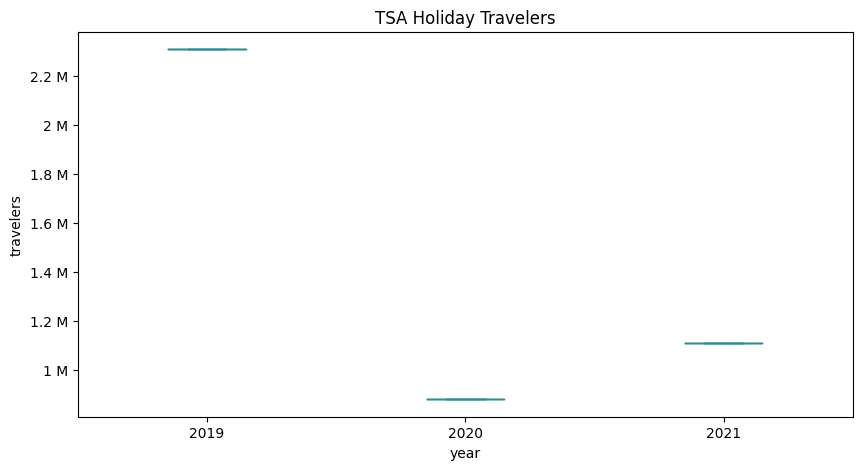

In [41]:
ax = plot_data.plot(kind='box', figsize=(10,5))
ax.set(xlabel="year", ylabel="travelers", title="TSA Holiday Travelers")
ax.yaxis.set_major_formatter(ticker.EngFormatter())

#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_year_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.